# Tratamento do Dataset

In [ ]:
# Bibliotecas 
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
data=pd.read_csv('train.csv') # dataset do projeto

#### data INFO

In [ ]:
# data.dtypes
data.info() #milage
# data.head()
# data.tail()
# data.shape #(3207, 12)
# data.nunique() # valores unicos para cada coluna

In [ ]:
# modelo mais antigo e mais novo:
antigo=data['model_year'].min()
novo=data['model_year'].max()
print(antigo,novo)

#### correção: 'milage' -> INT

In [ ]:
#milage:
valores_corrigidos=[]
for milage in data['milage']: # para cada quilometragem do dataset
    separa=re.split(r'[ ]',milage) # sepagar o numero do mi
    numero=separa[0] # numero
    letra=separa[1] # mi
    verifica=re.search(r'^[0-9]+[,]?[0-9]+$',numero) # verifica se o numeros sao sempre iguais(com casas decimais ou não)
    verifica2=re.search(r'^mi\.$',letra) # verifica se a letra é sempre mi
    if verifica and verifica2: # se seguir o padra numero + mi:
        numero=int(re.sub(r',','',numero)) # retira a , dos numeros e passa para inteiro ( estavam em obj)
        valores_corrigidos.append(numero)
    else: 
        print(milage,False) # tem dados diferentes no dataset

data['milage']=valores_corrigidos

In [ ]:
#verificaçao
for m in data['milage']:
    if not isinstance(m, (int)):
        print('dado incorreto')
# tudo certo

In [ ]:
data.describe()

#### NULL's

In [ ]:
data.isnull().sum()

#### counts

In [ ]:
data['fuel_type'].value_counts() # –  38 ( existem 38 linhas com (-) -> nao se sabe)
data['accident'].value_counts()
data['clean_title'].value_counts() # Yes -> 2740, os restantes são valores nulos (nan)
# data['clean_title'].unique()
# verificar outros tipos de dizer valores nulos: ( como (-) por exemplo)
data['brand'].value_counts() # tudo certo
data['model'].nunique() # tudo certo
data['model_year'].value_counts() # tudo certo
data['engine'].value_counts() # – 38 -> nao se sabe
data['transmission'].value_counts() # 4 -> nao se sabe 
# data['ext_col'].value_counts()# 11 -> nao se sabe
# data['int_col'].value_counts() # 98 -> nao se sabe
# for preco in data['price']: # tudo certo
#     if not isinstance(preco, int):
#         print('erro')

In [ ]:
len(data['milage'])
# len(data['milage'].unique())

##### --> nº de velocidades na transmissão existentes no dataset

In [ ]:
d2=list(data['transmission'].unique())
alls = [int(numero) for string in d2 for numero in re.findall(r'\d+', string)]
list(set(alls))

#### verificar significado de '-' e NaN para o tipo de combustível

In [ ]:
len(data.loc[data['fuel_type'] == '–'])

In [ ]:
data.loc[(data['fuel_type'] == '–') & (data['engine'] != '–')] 

###### OS CARROS PARA OS QUAIS O FUEL_TYPE É '-' NÃO INDICADO, TAMBÉM NÃO SE CONHECE A CONFIGURAÇÃO DO MOTOR

In [ ]:
# VERIFICAR QUE OS CARROS COM NAN NO TIPO DE COMBUSTÍVEL SÃO CARROS ELÉTRICOS
elec=data[data['fuel_type'].isnull()]
pattern = re.compile(r'\bElectric\b', flags=re.IGNORECASE)
contains_electric = elec['engine'].str.contains(pattern, na=False)
# Selecionar todas as linhas que não contêm 'Electric' na coluna 'engine'
elec[~contains_electric]
# elec[contains_electric].head(10)

###### os carros com NaN para 'fuel_type' são carros elétricos
Tesla --> elétrico
Standard Range Battery --> elétrico
111.2Ah / FR 70kW / RR 160kW (697V) --> especificidade de baterias

### gráficos

#### BOXPLOT

In [ ]:
data.plot(kind='box',figsize=(15,6),subplots=True) # grafico do codigo acima

In [ ]:
data[data['model_year']<1990] # outlier do 1º gráfico

In [ ]:
data[data['milage']>350000] # outlier do 2º gráfico

In [ ]:
data[data['price']>1500000] # outlier 3º gráfico

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Supondo que 'data' seja seu DataFrame com colunas de atributos e 'preco'
# Vamos calcular a média do preço para cada atributo (exceto a última coluna)
data['fuel_type'].fillna('Elétrico', inplace=True)

# Lista para armazenar os gráficos gerados
colunas = ['brand', 'model', 'model_year', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
num_linhas = 3
num_colunas = 3

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(colunas[:-1]):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(10)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='deepskyblue')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()


#### análise dos modelos com preço mais altos

In [ ]:
d=data.sort_values(by='price', ascending=False).head(10)
d[['brand', 'model', 'price']].head(10)

#### LINEPLOT

In [ ]:
d = data.groupby('milage')['price'].mean()
d=d.sort_index()
plt.scatter(d.index, d.values, marker='o', linestyle='-')
plt.title('Preço Médio em Função do Número de Quilômetros')
plt.xlabel('Quilometragem')
plt.ylabel('Preço Médio')
plt.xticks(rotation=45)

plt.tight_layout()  # Ajuste automático da disposição para evitar sobreposição
plt.show()


#### o preço diminui a medida que o nº de quilometros aumenta

In [ ]:
summary_stats = data.groupby(['brand', 'model_year'])['price'].describe()
print(summary_stats)

# [ENGINE] novos atributos 

In [ ]:
data['Potencia'] = data['engine'].str.extract(r'(\d+\.\d+)HP?')
data['Capacidade_Motor'] = data['engine'].str.extract(r'(\d+\.\d+|\d+)\s*(?:L|Liter)')
data['Numero_Cilindros'] = data['engine'].str.extract(r'(?:V(\d+)|I-(\d+)|I(\d+)|(\d+) Cylinder)').apply(lambda x: next(filter(lambda y: pd.notna(y), x), None), axis=1)
# data['Tipo_Combustivel'] = data['engine'].str.extract(r'(Gasoline Fuel|Flexible Fuel|Electric)')
data['Numero_Valvulas'] = data['engine'].str.extract(r'( \d+)V')

data['Potencia'] = pd.to_numeric(data['Potencia'], errors='coerce')
data['Capacidade_Motor'] = pd.to_numeric(data['Capacidade_Motor'], errors='coerce')
data['Numero_Cilindros'] = pd.to_numeric(data['Numero_Cilindros'], errors='coerce')
data['Numero_Valvulas'] = pd.to_numeric(data['Numero_Valvulas'], errors='coerce')

In [ ]:
data.info()

In [ ]:
data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)

In [ ]:
d=len(data[data['Numero_Valvulas'].isnull()])
d
# d[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(50)
# data[['engine', 'Potencia', 'Capacidade_Motor',  'Numero_Cilindros',  'Numero_Valvulas' ]].head(10)

#### BARPLOT

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame with columns of attributes and 'price'
# Let's calculate the mean price for each attribute (except the last column)

# List to store the generated plots
columns = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas']

num_linhas = 2
num_colunas = 2

fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 5))

# Iterar sobre as colunas do DataFrame
for i, column in enumerate(columns):
    # Calcular a média do preço para cada valor único na coluna
    med = data.groupby(column)['price'].mean()
    top = med.sort_values(ascending=False).head(13)
    
    # Truncate long labels and append ellipsis
    truncated_labels = [str(val)[:10] + '...' if len(str(val)) > 10 else str(val) for val in top.index]

    # Determine the subplot index
    linha = i // num_colunas
    coluna = i % num_colunas

    # Plotar o gráfico de barras para a média do preço por valor
    axs[linha, coluna].bar(truncated_labels, top.values, color='blueviolet')
    axs[linha, coluna].set_title(f'Média de Preço por {column.upper()}')
    axs[linha, coluna].set_ylabel('Média de Preço')
    axs[linha, coluna].tick_params(axis='x', rotation=45)  # Rotacionar rótulos do eixo x

# Ajustar o layout para evitar sobreposição
plt.tight_layout(rect=[0, 0.1, 1, 2])
plt.show()

In [ ]:
# data.loc[data['Numero_Valvulas'] == 32]

In [ ]:
len(data['Numero_Valvulas'].unique())
sorted(list(data['Numero_Valvulas'].unique()))

In [ ]:
len(data['Numero_Cilindros'].unique())
list(sorted(data['Numero_Cilindros'].unique()))

In [ ]:
# len(data['Capacidade_Motor'].unique())
#sorted(list(data['Capacidade_Motor'].unique()))

In [ ]:
#sorted(data['Potencia'].unique())

# verificação de possíveis valores únicos reportados pela análise do boxplot preço / marca no R

In [ ]:
data.loc[data['brand'] == 'Maybach'].head()

In [ ]:
data.to_csv('train_ccols.csv', index=False)

# [SUBSETS] com dataset W/ ENGINE caract-

In [ ]:
import pandas as pd
import datetime as dt
import re
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
p=pd.read_csv('train_ccols.csv') 

In [ ]:
p.info()

In [ ]:
p.columns

In [ ]:
print(p.duplicated().sum())

### Substituir pela mediana :
- num valvulas
- num cilindros
- potencia
- capacidade_motor

In [ ]:
m = p['Numero_Valvulas'].median()
m2 = p['Numero_Cilindros'].median()
m3 = p['Potencia'].median()
m4 = p['Capacidade_Motor'].median()

p['Numero_Valvulas'].fillna(m, inplace=True)
p['Numero_Cilindros'].fillna(m2, inplace=True)
p['Potencia'].fillna(m3, inplace=True)
p['Capacidade_Motor'].fillna(m4, inplace=True)

#### Clean title

In [ ]:
p['clean_title'] = p['clean_title'].fillna('No')

### novos atributos (derivações)

#### T2

In [ ]:
# import numpy as np
p['T2'] = p['transmission'].str.extract(r'(\d+)')
p['T2'] = pd.to_numeric(p['T2'], errors='coerce')
m5 = p['T2'].mean() 
p['T2'].fillna(round(m5), inplace=True)
#p.head()
#p['T2'].isnull().sum()
# p['T2'].unique()

#### Categoria ET (engine + transmission)

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = p[['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
n_clusters = 5

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_scaled)

# Adicionar uma nova coluna 'Categoria' ao DataFrame com base nos clusters
p['Categoria_ET'] = kmeans.labels_
import matplotlib.pyplot as plt

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria_ET'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria_ET')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

#Mostrar o gráfico
plt.show()

p['Categoria_ET'].unique()


In [ ]:
p['Categoria_ET'] = p['Categoria_ET'].astype('category')

#### categoria Marca

In [ ]:
frequencias = p['brand'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Marca'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Marca'
    else:
        return 'Média Frequência Marca'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Marca'] = p['brand'].map(frequencias.apply(categorizar))

p['Categoria_Marca'] = p['Categoria_Marca'].astype('category')
p['Categoria_Marca'].value_counts()

#### Categoria Modelo

In [ ]:
frequencias = p['model'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência Modelo'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência Modelo'
    else:
        return 'Média Frequência Modelo'


# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
p['Categoria_Modelo'] = p['model'].map(frequencias.apply(categorizar))
p['Categoria_Modelo'] = p['Categoria_Modelo'].astype('category')
p['Categoria_Modelo'].value_counts()
p['Categoria_Modelo'].unique()

# p=subset_1_s_out 
#### atributos auxiliares ao cenário extra

In [246]:
p=subset_1_s_out # pegar no dataset sem outliers considerado sempre como mais eficaz pelos modelos durante a modelação

### categoria MarcaModelo

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt


# Definir as colunas categóricas e numéricas
v_catg = ['brand', 'model']
v_num = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros', 'Numero_Valvulas', 'T2']

# Criar transformador para colunas categóricas
categorical_transformer = OneHotEncoder()

# Criar um pipeline de pré-processamento que inclui OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, v_catg),
        ('num', StandardScaler(), v_num)
    ])

# Aplicar o pré-processamento aos dados
X = p[v_catg + v_num]
X_preprocessed = preprocessor.fit_transform(X)

# Definir o número de clusters
n_clusters = 13

# Aplicar o algoritmo K-means para agrupar os carros em clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_preprocessed)

# Adicionar uma nova coluna 'Categoria_MarcaModelo' ao DataFrame com base nos clusters
p['Categoria_MarcaModelo'] = kmeans.labels_

# Contagem de amostras em cada categoria
categoria_counts = p['Categoria_MarcaModelo'].value_counts().sort_index()

# Criar o gráfico de barras
plt.bar(categoria_counts.index, categoria_counts.values)

# Adicionar rótulos e título
plt.xlabel('Categoria_MarcaModelo')
plt.ylabel('Número de amostras')
plt.title('Distribuição das Categorias')

# Mostrar o gráfico
plt.show()

# Mostrar categorias únicas
print(p['Categoria_MarcaModelo'].unique())

In [ ]:
p['Categoria_MarcaModelo'] = p['Categoria_MarcaModelo'].astype('category')

In [ ]:
# def condicao_do_veiculo(row):
#     if row['accident'] == 'At least 1 accident or damage reported' and row['clean_title'] == 'No':
#         return 'mau'
#     elif row['accident'] == 'None reported' and row['clean_title'] == 'Yes':
#         return 'bom'
#     else:
#         return 'avg'

# p['condicao_do_veiculo'] = p.apply(condicao_do_veiculo, axis=1)

In [ ]:
# popularidade_do_modelo = p['model'].value_counts().to_dict()
# p['model_popularity'] = p['model'].map(popularidade_do_modelo)

In [ ]:
# p['milage_por_ano'] = p['milage'] / (2024 - p['model_year'] + 1e-9)

## potencia / capacidade relação

In [ ]:
p['Potencia_Capacidade_Relacao'] = p['Potencia'] / p['Capacidade_Motor']

# normalidade das novas colunas (numéricas)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Lista das colunas numéricas que você deseja analisar
colunas_numericas = ['Potencia', 'Capacidade_Motor', 'Numero_Cilindros',
       'Numero_Valvulas', 'T2']

num_colunas = len(colunas_numericas)
fig, axs = plt.subplots(2, num_colunas, figsize=(15, 8))
print(f'Teste de Shapiro-Wilk: \n')

# Iterar sobre as colunas numéricas e plotar os gráficos em cada subplot
for i, coluna in enumerate(colunas_numericas):
    # Histograma
    sns.histplot(p[coluna], kde=True, ax=axs[0, i])
    axs[0, i].set_title(f'{coluna}')
    
    # Gráfico QQ
    stats.probplot(p[coluna], dist="norm", plot=axs[1, i])
    axs[1, i].set_title(f'QQ-plot')
 
    # Teste de Shapiro-Wilk
    stat, pv = stats.shapiro(p[coluna])
    print(f'{coluna}:')
    print(f'Valor p: {pv}')
    if pv > 0.05:
        print('Não podemos rejeitar a hipótese nula - A distribuição parece normal.')
    else:
        print('Rejeita-se a hipótese nula -> a distribuição não segue o modelo normal.')
    
plt.tight_layout()
plt.show()

como se pode observar, nenhum dos novos atributos (numéricos possuem distribuição normal)

# subset 1

- Substituição de valores nulos e '-' PELA MODA
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data1 = p

In [ ]:
data1.describe()

In [ ]:
data1.info()

In [ ]:
data1.head()

### NULL's substitution

In [ ]:
data1['fuel_type'].unique()
data1['fuel_type'].isnull().sum()
data1['fuel_type'].fillna('Eletric', inplace=True)
mod = data1['fuel_type'].mode()[0]

data1['fuel_type'] = data1['fuel_type'].replace('–', mod)
data1['fuel_type'].unique()

mod1=data1['accident'].mode()[0]
data1['accident'].fillna(mod1, inplace=True)

mod3=data1['engine'].mode()[0]
data1['engine'] = data1['engine'].replace('–', mod3)

mod5=data1['ext_col'].mode()[0]
data1['ext_col'] = data1['ext_col'].replace('–', mod5)

mod6=data1['int_col'].mode()[0]
data1['int_col'] = data1['int_col'].replace('–', mod6)

mod7=data1['transmission'].mode()[0]
data1['transmission'] = data1['transmission'].replace('–', mod6)

#### Categoria cor interna

In [ ]:
frequencias = data1['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_IntCol'] = data1['int_col'].map(frequencias.apply(categorizar))
data1['Categoria_IntCol'] = data1['Categoria_IntCol'].astype('category')
data1['Categoria_IntCol'].value_counts()

In [ ]:
data1['ext_col'].unique()

##### Categoria cor externa

In [ ]:
frequencias = data1['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    elif limite_baixa < frequencia < limite_alta:  # Verifica se a frequência está entre os limites
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data1['Categoria_ExtCol'] = data1['ext_col'].map(frequencias.apply(categorizar))
data1['Categoria_ExtCol'] = data1['Categoria_ExtCol'].astype('category')
data1['Categoria_ExtCol'].value_counts()
data1['Categoria_ExtCol'].unique()

## Correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data1.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)


In [ ]:
#va's categóricas
categorical_columns = data1.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data1[column], data1['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

## Outlier por IQR -> va. Numéricas

In [ ]:
outlier_indices_dict = {}

# Variáveis Numéricas
for column in data1.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data1[column].quantile(0.25)
    Q3 = data1[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data1[column] > Q1 - 1.5*IQR) & (data1[column] < Q3 + 1.5*IQR))

    outlier_indices_dict[column] = data1.loc[~outlier_conditional].index
    
    num_outliers = len(data1[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

###### O número de válvulas têm muito pouca correlação com o preço -> N utiliza-se essa coluna para os cenários!
###### Remove-se os 6 registros da capacidade do motor e os 57 com num de cilindros e 376 do T2


##### Remover registros com outliers (cujo correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data1_s_out = data1.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data1_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data1_s_out))

In [ ]:
data1.to_csv('subset_1.csv', index=False) # sem normalizar com outliers
data1_s_out.to_csv('subset_1_s_out.csv', index=False) # sem normalizar sem outliers

# subset 2

-  substituir '-' por desconhecido
- Remoção outliers LOF
- Variavies cat -> numerica

In [ ]:
data2=p

In [ ]:
p.columns

### NULL's substitution

### Fuel Type

In [ ]:
data2['fuel_type'].unique()
data2['fuel_type'].isnull().sum()
data2['fuel_type'].fillna('Eletric', inplace=True)
data2['fuel_type'] = data2['fuel_type'].replace('–', 'desconhecido')

#### accident + engine + transmission + ex_col + int_col

In [ ]:
data2['accident'].fillna('desconhecido', inplace=True)
data2['engine'] = data2['engine'].replace('–', 'desconhecido')
data2['transmission'] = data2['transmission'].replace('–', 'desconhecido')
data2['ext_col'] = data2['ext_col'].replace('–', 'desconhecido')
data2['int_col'] = data2['int_col'].replace('–', 'desconhecido')


#### Categoria cor interna

In [ ]:
frequencias = data2['int_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência int_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência int_col'
    else:
        return 'Média Frequência int_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_IntCol'] = data2['int_col'].map(frequencias.apply(categorizar))
data2['Categoria_IntCol'] = data2['Categoria_IntCol'].astype('category')
data2['Categoria_IntCol'].value_counts()

#### Categoria cor externa

In [ ]:
frequencias = data2['ext_col'].value_counts()

# Define os limites das categorias
limite_alta = frequencias.quantile(0.75)
limite_baixa = frequencias.quantile(0.25)

# Função para atribuir categoria com base na frequência
def categorizar(frequencia):
    if frequencia >= limite_alta:
        return 'Alta Frequência ext_col'
    elif frequencia <= limite_baixa:
        return 'Baixa Frequência ext_col'
    else:
        return 'Média Frequência ext_col'

# Adiciona uma nova coluna 'categoria' ao DataFrame com as categorias das marcas
data2['Categoria_ExtCol'] = data2['ext_col'].map(frequencias.apply(categorizar))
data2['Categoria_ExtCol'] = data2['Categoria_ExtCol'].astype('category')
data2['Categoria_ExtCol'].value_counts()

### Correlações

In [ ]:
import pandas as pd
from scipy.stats import spearmanr

# Selecionar apenas as variáveis numéricas
numeric_df = data2.select_dtypes(include=['int64', 'float64'])

# Calcular a correlação de Spearman
spearman_corr = numeric_df.corr(method='spearman')

# Visualizar a matriz de correlação de Spearman
print("Matriz de correlação de Spearman:")
print(spearman_corr)

In [ ]:
#va categorica
categorical_columns = data2.select_dtypes(include=['object','category']).columns
correlations = {}
for column in categorical_columns:
    corr, _ = spearmanr(data2[column], data2['price'])
    correlations[column] = corr

sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)
sorted_correlations

### Outlier por IQR -> va.'s Numéricas

In [ ]:
# Variáveis Numéricas
for column in data2.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = data2[column].quantile(0.25)
    Q3 = data2[column].quantile(0.75)
    IQR = Q3 - Q1
    
    outlier_conditional = ((data2[column] > Q1 - 1.5*IQR) & (data2[column] < Q3 + 1.5*IQR))
    outlier_indices_dict[column] = data2.loc[~outlier_conditional].index
    
    num_outliers = len(data2[~outlier_conditional])
    print(f"Número de outliers em '{column}': {num_outliers}")

##### Remover registros com outliers (cuja correlação baixa com preço)

In [ ]:
outlier_indices_dict['Capacidade_Motor']
outlier_indices_dict['Numero_Cilindros']
outlier_indices_dict['T2']

data2_s_out = data2.copy()

outlier_indices_to_drop = outlier_indices_dict['Capacidade_Motor'].union(outlier_indices_dict['Numero_Cilindros']).union(outlier_indices_dict['T2'])
data2_s_out.drop(outlier_indices_to_drop, inplace=True)

# Verifica o tamanho do novo conjunto de dados
print("Número de registros no novo conjunto de dados sem outliers:", len(data2_s_out))

In [ ]:
data2.to_csv('subset_2.csv', index=False) # sem normalizar com outliers
data2_s_out.to_csv('subset_2_s_out.csv', index=False) # sem normalizar sem outliers

In [ ]:
data2.info()

# MODELAÇÃO
### Como subset 1 é muito parecido com subset 2, só vamos utilizar o subset 1

In [258]:
import pandas as pd
subset_1=pd.read_csv('subset_1.csv')
subset_1_s_out=pd.read_csv('subset_1_s_out.csv')
pd.set_option('display.max_rows', None)

In [ ]:
subset_1.columns

# Cenário 1

### com outliers

In [ ]:
X1 = subset_1[['brand','model','model_year','milage','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title']]
y1 = subset_1['price'] 

#### label logaritmizada (preço) + normalização

### sem outliers

In [ ]:
X1out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','engine','ext_col','int_col','accident','clean_title']] # tinha T2 » retirei...
y1out = subset_1_s_out['price'] 

# Cenário 2

#### com outliers

In [259]:
X2 = subset_1[['model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'Categoria_ET', 'Categoria_Marca', 'Categoria_Modelo', 'Categoria_IntCol', 'Categoria_ExtCol']]
y2 = subset_1['price'] 

#### sem outlier

In [260]:
X2out = subset_1_s_out[['model_year','milage','fuel_type','accident','clean_title','Categoria_ET','Categoria_Marca','Categoria_Modelo','Categoria_IntCol','Categoria_ExtCol']]  
y2out = subset_1_s_out['price'] 

# Cenário 3

#### com outliers

In [ ]:
X3=subset_1[['Potencia','Capacidade_Motor','Numero_Cilindros','T2', 'model_year', 'milage', 'Numero_Valvulas']]
y3=subset_1['price']

#### sem outlier

In [ ]:
X3out = subset_1_s_out[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year', 'milage', 'Numero_Valvulas']] 
y3out = subset_1_s_out['price']

# Cenário 4

#### com outliers

In [ ]:
X4=subset_1[['brand','model','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title']]
y4=subset_1['price']

#### sem outliers

In [ ]:
X4out = subset_1_s_out[['brand','model','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title']]
y4out = subset_1_s_out['price']

# Cenário Extra

In [ ]:
XX=p[['Potencia','Capacidade_Motor','Numero_Cilindros','T2','model_year','Numero_Valvulas', 'brand','model','milage','fuel_type','ext_col','int_col','accident','clean_title','Potencia_Capacidade_Relacao', 'Categoria_MarcaModelo']]
y=p['price']

# previsões para os cenários

### Separar Data / Treinar e Avaliar Algoritmos

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split as split
# from sklearn import datasets
from slickml.metrics import (
    RegressionMetrics,
)  # downloaded from https://github.com/slickml/slick-ml # btw pip install slickml
from matplotlib import pyplot as plt
import shap

### cross validation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
)

# Definir o número de folds para a cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Função para calcular Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Função para calcular REC AUC
def rec_auc(y_true, y_pred):
    # Calcula o erro normalizado
    error = np.abs(y_true - y_pred) / np.abs(y_true)
    # Ordena os erros
    sorted_error = np.sort(error)
    # Frequência cumulativa relativa
    cumulative_freq = np.arange(1, len(sorted_error) + 1) / len(sorted_error)
    # Calcula a AUC utilizando a regra do trapezoide
    return np.trapz(cumulative_freq, sorted_error)

def calculate_rec_curve(y_true, y_pred):
    # Calcula o erro normalizado
    error = np.abs(y_true - y_pred) / np.abs(y_true)
    # Ordena os erros
    sorted_error = np.sort(error)
    # Frequência cumulativa relativa
    cumulative_freq = np.arange(1, len(sorted_error) + 1) / len(sorted_error)
    return sorted_error, cumulative_freq

# Função para calcular Coefficient of Variation
def coefficient_of_variation(y_true, y_pred):
    return np.std(y_pred) / np.mean(y_pred)

# Função para calcular Mean of Variation
def mean_of_variation(y_true, y_pred):
    return np.mean(y_pred) / np.mean(y_true)

def plot_rec_curves(curves):
    plt.figure(figsize=(10, 6))
    
    for model_id, (sorted_error, cumulative_freq) in curves.items():
        if model_id == 1:
            label = 'Regressão Linear'
        elif model_id == 2:
            label = 'Random Forest'
        elif model_id ==3:
            label='Ada Boost'
        elif model_id==4:
            label='Decision Tree'
        else: label='Neural Net'

        plt.plot(sorted_error, cumulative_freq, label=label)
        
    
    plt.xlabel('Relative Error')
    plt.ylabel('Cumulative Frequency')
    plt.title('Curva REC')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

def modelo (n,X,y):
    # Listas para armazenar os resultados da validação cruzada
    cv_r2_scores = []
    cv_ev_scores = []
    cv_mae_scores = []
    cv_mse_scores = []
    cv_msle_scores = []
    cv_mape_scores = []
    cv_rec_auc_scores = []
    cv_coeff_var_scores = []
    cv_mean_var_scores = []
    c={}

    for train_index, test_index in kf.split(X):
        # Dividir dados em treino e teste
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num=X.select_dtypes(include=['int64','float64']).columns.tolist()
        features_cat=X.select_dtypes(include=['object','category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
            )
        
        # Aplicar preprocessamento
        X_train_norm = preprocessor.fit_transform(X_train)
        X_test_norm = preprocessor.transform(X_test)
        
        # Logaritmizar
        y_train_log = np.log(y_train)
        y_test_log = np.log(y_test)
         
        if n==1:
            model=regressao_linear(X_train_norm,y_train_log)
        elif n==2:
            model=random_forest(X_train_norm,y_train_log)
        elif n==3:
            model=ada_boost(X_train_norm,y_train_log)
        elif n==4:
            model=decison_tree(X_train_norm,y_train_log)
        else:
            model=rn(X_train_norm,y_train_log,X_test_norm,y_test_log)
            
        if n == 5:
            pred_log = model.predict(X_test_norm).flatten()
        else:
            pred_log = model.predict(X_test_norm)
            
        pred_orig_scale = np.exp(pred_log)

        sorted_error, cumulative_freq = calculate_rec_curve(y_test, pred_orig_scale)
        c[n] = (sorted_error, cumulative_freq)
        
        # Calcular as métricas
        r2 = r2_score(np.exp(y_test_log), pred_orig_scale)
        ev = explained_variance_score(np.exp(y_test_log), pred_orig_scale)
        mae = mean_absolute_error(np.exp(y_test_log), pred_orig_scale)
        mse = mean_squared_error(np.exp(y_test_log), pred_orig_scale)
        msle = mean_squared_log_error(np.exp(y_test_log), pred_orig_scale)
        mape = mean_absolute_percentage_error(np.exp(y_test_log), pred_orig_scale)
        rec_auc_value = rec_auc(np.exp(y_test_log), pred_orig_scale)
        #rec_curve = calculate_rec_curve(np.exp(y_test_log), pred_orig_scale)
        coeff_var = coefficient_of_variation(np.exp(y_test_log), pred_orig_scale)
        mean_var = mean_of_variation(np.exp(y_test_log), pred_orig_scale)

        # Armazenar as métricas
        cv_r2_scores.append(r2)
        cv_ev_scores.append(ev)
        cv_mae_scores.append(mae)
        cv_mse_scores.append(mse)
        cv_msle_scores.append(msle)
        cv_mape_scores.append(mape)
        cv_rec_auc_scores.append(rec_auc_value)
        cv_coeff_var_scores.append(coeff_var)
        cv_mean_var_scores.append(mean_var)

# Calcular as médias e desvios padrão das métricas
    metrics = {
        "R2 Score": (np.mean(cv_r2_scores), np.std(cv_r2_scores)),
        "Explained Variance Score": (np.mean(cv_ev_scores), np.std(cv_ev_scores)),
        "Mean Absolute Error": (np.mean(cv_mae_scores), np.std(cv_mae_scores)),
        "Mean Squared Error": (np.mean(cv_mse_scores), np.std(cv_mse_scores)),
        "Mean Squared Log Error": (np.mean(cv_msle_scores), np.std(cv_msle_scores)),
        "Mean Absolute Percentage Error": (np.mean(cv_mape_scores), np.std(cv_mape_scores)),
        "REC AUC": (np.mean(cv_rec_auc_scores), np.std(cv_rec_auc_scores)),
        "Coeff. of Variation": (np.mean(cv_coeff_var_scores), np.std(cv_coeff_var_scores)),
        "Mean of Variation": (np.mean(cv_mean_var_scores), np.std(cv_mean_var_scores))
    }
     
    return metrics, c

### regressão linear

In [ ]:

from sklearn.linear_model import LinearRegression

#cenario 1 -> com outlier
def regressao_linear(X_train_norm,y_train_log):
    model = LinearRegression()
    model.fit(X_train_norm, y_train_log)
    return model

#modelo(1,X1,y1)

### random forest

In [ ]:
#cenario 1 -> com outlier
def random_forest(X_train_norm,y_train_log):
    model = RandomForestRegressor()
    model.fit(X_train_norm,y_train_log)
    return model
#modelo(2,X1,y1)



### ada boost

In [ ]:
# Cenario 1 -> com outliers 
def ada_boost(X_train_norm,y_train_log):
    model = AdaBoostRegressor()
    model.fit(X_train_norm,y_train_log)
    return model
#modelo(3,X1,y1)




### decision tree

In [ ]:

# Cenario 1 -> com outliers 
def decison_tree(X_train_norm,y_train_log):
    model = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
    model.fit(X_train_norm,y_train_log)
    return model
#modelo(4,X1,y1)


### redes neurais

#### dropout + regularização

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


# Cenario 1 -> com outliers 
def rn(X_train_norm,y_train_log,X_test_norm,y_test_log):
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_dim=X_train_norm.shape[1]))
    model.add(Dropout(0.3))  # Dropout para reduzir overfitting
    model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    model.fit(X_train_norm, y_train_log, epochs=50, batch_size=32, validation_data=(X_test_norm, y_test_log))
    return model
#modelo(5,X1,y1)

#Plotando gráfico do histórico de treinamento
# import matplotlib.pyplot as plt

# plt.plot(resultado.history['loss'])
# plt.plot(resultado.history['val_loss'])
# plt.title('Histórico de Treinamento')
# plt.ylabel('Função de custo')
# plt.xlabel('Épocas de treinamento')
# plt.legend(['Erro treino', 'Erro teste'])
# plt.show()


#### greedy search -> otimização de parâmetros RN

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Função para construir o modelo Keras
def create_model(units1=64, units2=32, dropout_rate=0.5, kernel_regularizer=0.01):
    model = Sequential()
    model.add(Dense(units=units1, activation='relu', input_dim=X1_train_norm.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=units2, activation='relu', kernel_regularizer=regularizers.l2(kernel_regularizer)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

# Definindo os parâmetros a serem otimizados
param_grid = {
    'units1': [32, 64, 128],
    'units2': [16, 32, 64],
    'dropout_rate': [0.3, 0.5, 0.7],
    'kernel_regularizer': [0.001, 0.01, 0.1]
}

# Realizando a pesquisa em grade
grid_search_results = []

for units1 in param_grid['units1']:
    for units2 in param_grid['units2']:
        for dropout_rate in param_grid['dropout_rate']:
            for kernel_regularizer in param_grid['kernel_regularizer']:
                model = create_model(units1=units1, units2=units2, dropout_rate=dropout_rate, kernel_regularizer=kernel_regularizer)
                history = model.fit(X1_train_norm, y1_train_log, epochs=100, batch_size=32, verbose=0, validation_split=0.2, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])
                val_loss = history.history['val_loss'][-1]
                grid_search_results.append({
                    'units1': units1,
                    'units2': units2,
                    'dropout_rate': dropout_rate,
                    'kernel_regularizer': kernel_regularizer,
                    'val_loss': val_loss
                })

# Encontrando os melhores parâmetros
best_params = min(grid_search_results, key=lambda x: x['val_loss'])

# Imprimindo os resultados
print("Melhores parâmetros encontrados: ", best_params)

## comparação dos resultados

#### Cenário 1 -> Com Outlier

In [ ]:
import pandas as pd

metrics_rl,c_rl=modelo(1,XX,y)
metrics_rf, c_rf=modelo(2,XX,y)
metrics_ada,c_ada=modelo(3,XX,y)
metrics_dt,c_dt=modelo(4,XX,y)
metrics_rn,c_rn=modelo(5,XX,y)

metrics_df = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "AdaBoost", "Decision Tree", "Neural Network"],
    "R2 Score": ["{:.2f} +- {:.2f}".format(metrics_rl["R2 Score"][0], metrics_rl["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_rf["R2 Score"][0], metrics_rf["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_ada["R2 Score"][0], metrics_ada["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_dt["R2 Score"][0], metrics_dt["R2 Score"][1]),
                 "{:.2f} +- {:.2f}".format(metrics_rn["R2 Score"][0], metrics_rn["R2 Score"][1])],
    "Explained Variance Score": ["{:.2f} +- {:.2f}".format(metrics_rl["Explained Variance Score"][0], metrics_rl["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_rf["Explained Variance Score"][0], metrics_rf["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_ada["Explained Variance Score"][0], metrics_ada["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_dt["Explained Variance Score"][0], metrics_dt["Explained Variance Score"][1]),
                                  "{:.2f} +- {:.2f}".format(metrics_rn["Explained Variance Score"][0], metrics_rn["Explained Variance Score"][1])],
    "Mean Absolute Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Absolute Error"][0], metrics_rl["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_rf["Mean Absolute Error"][0], metrics_rf["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_ada["Mean Absolute Error"][0], metrics_ada["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_dt["Mean Absolute Error"][0], metrics_dt["Mean Absolute Error"][1]),
                             "{:.2f} +- {:.2f}".format(metrics_rn["Mean Absolute Error"][0], metrics_rn["Mean Absolute Error"][1])],
    "Mean Squared Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Squared Error"][0], metrics_rl["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rf["Mean Squared Error"][0], metrics_rf["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_ada["Mean Squared Error"][0], metrics_ada["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_dt["Mean Squared Error"][0], metrics_dt["Mean Squared Error"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rn["Mean Squared Error"][0], metrics_rn["Mean Squared Error"][1])],
    "Mean Squared Log Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Squared Log Error"][0], metrics_rl["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_rf["Mean Squared Log Error"][0], metrics_rf["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_ada["Mean Squared Log Error"][0], metrics_ada["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_dt["Mean Squared Log Error"][0], metrics_dt["Mean Squared Log Error"][1]),
                                "{:.2f} +- {:.2f}".format(metrics_rn["Mean Squared Log Error"][0], metrics_rn["Mean Squared Log Error"][1])],
    "Mean Absolute Percentage Error": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean Absolute Percentage Error"][0], metrics_rl["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_rf["Mean Absolute Percentage Error"][0], metrics_rf["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_ada["Mean Absolute Percentage Error"][0], metrics_ada["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_dt["Mean Absolute Percentage Error"][0], metrics_dt["Mean Absolute Percentage Error"][1]),
                                        "{:.2f} +- {:.2f}".format(metrics_rn["Mean Absolute Percentage Error"][0], metrics_rn["Mean Absolute Percentage Error"][1])],
    "REC AUC": ["{:.2f} +- {:.2f}".format(metrics_rl["REC AUC"][0], metrics_rl["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_rf["REC AUC"][0], metrics_rf["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_ada["REC AUC"][0], metrics_ada["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_dt["REC AUC"][0], metrics_dt["REC AUC"][1]),
                "{:.2f} +- {:.2f}".format(metrics_rn["REC AUC"][0], metrics_rn["REC AUC"][1])],
    "Coeff. of Variation": ["{:.2f} +- {:.2f}".format(metrics_rl["Coeff. of Variation"][0], metrics_rl["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rf["Coeff. of Variation"][0], metrics_rf["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_ada["Coeff. of Variation"][0], metrics_ada["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_dt["Coeff. of Variation"][0], metrics_dt["Coeff. of Variation"][1]),
                            "{:.2f} +- {:.2f}".format(metrics_rn["Coeff. of Variation"][0], metrics_rn["Coeff. of Variation"][1])],
    "Mean of Variation": ["{:.2f} +- {:.2f}".format(metrics_rl["Mean of Variation"][0], metrics_rl["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_rf["Mean of Variation"][0], metrics_rf["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_ada["Mean of Variation"][0], metrics_ada["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_dt["Mean of Variation"][0], metrics_dt["Mean of Variation"][1]),
                          "{:.2f} +- {:.2f}".format(metrics_rn["Mean of Variation"][0], metrics_rn["Mean of Variation"][1])]})

metrics_df

#### Curva de REC

In [ ]:
all_curves = {**c_rl, **c_rf, **c_ada, **c_dt, **c_rn}

# Plotar todas as curvas REC
plot_rec_curves(all_curves)

## tarefa classificação

In [262]:
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from sklearn.metrics import classification_report, confusion_matrix

In [263]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
import seaborn as sns
import matplotlib.pyplot as plt  # Importar também o matplotlib para controle adicional sobre os gráficos
def modelo_classificacao(n,X,y):
    bins = [0, 10000, 30000, 60000, 100000, float('inf')]
    labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Luxo']
    y = pd.cut(y, bins=bins, labels=labels)
    y_true_all, y_pred_all,y_pred_all_original = [], [],[]

    for train_index, test_index in kf.split(X):
        # Dividir dados em treino e teste
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        features_num=X.select_dtypes(include=['int64','float64']).columns.tolist()
        features_cat=X.select_dtypes(include=['object','category']).columns.tolist()

        preprocessor = make_column_transformer(
            (StandardScaler(), features_num),
            (OneHotEncoder(handle_unknown="ignore"), features_cat),
            )
        
        # Aplicar preprocessamento
        X_train_norm = preprocessor.fit_transform(X_train)
        X_test_norm = preprocessor.transform(X_test)

        smote = SMOTE(random_state=42)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_norm, y_train)
         
        if n==6:
            model=svm(X_train_smote,y_train_smote)
        elif n==7:
            model=decision_tree_cl(X_train_smote,y_train_smote)
        elif n==8:
            model=regressao_logistica(X_train_smote,y_train_smote)
        elif n==9:
            model=ada_boost_cl(X_train_smote,y_train_smote)
        else:
            model, y_test, le=rn_cl(X_train_smote,y_train_smote,X_test_norm,y_test)

        y_pred = model.predict(X_test_norm)
        y_pred_all_original.extend(y_pred)

        if n==10:
            y_pred = np.argmax(y_pred, axis=1)
        
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

    if n==6:
            y_test_binarized = label_binarize(y_true_all, classes=np.unique(y_true_all))
            y_pred_binarized = label_binarize(y_pred_all, classes=np.unique(y_pred_all))
            curva_roc(y_test_binarized ,y_pred_binarized,labels)
    elif n==10:
        y_test_cat = to_categorical(y_true_all)
        curva_roc_rn(y_test_cat,y_pred_all_original,le)
    else: 
        y_score = model.predict_proba(X_test_norm)
        y_test_bin = label_binarize(y_test, classes=labels)
        curva_roc(y_test_bin,y_score,labels)

    repertorio=classification_report(y_true_all, y_pred_all, target_names=labels)

    matrix = confusion_matrix(y_true_all, y_pred_all)
    print(plot_confusion_matrix(matrix, labels))
    
    return print(repertorio)

#### Curva ROC

In [264]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def curva_roc(y_test_binarized ,y_pred_binarized,labels):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plotando a curva ROC para cada classe
    plt.figure(figsize=(8, 6))
    for i in range(len(labels)):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {labels[i]}')

    plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [265]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
import seaborn as sns

def curva_roc_rn(y_test_cat, y_pred_nn, le):
    y_test_cat = np.array(y_test_cat)
    y_pred_nn = np.array(y_pred_nn)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_test_cat.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred_nn[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Calcular a curva ROC média (macro)
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plotar todas as curvas ROC
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--')  # Linha de não discriminação
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'blue', 'yellow', 'pink'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC classe {le.classes_[i]} (área = {roc_auc[i]:.2f})')

    plt.plot(fpr["macro"], tpr["macro"], color='navy', linestyle=':', linewidth=4, label=f'ROC média (macro) (área = {roc_auc["macro"]:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC para cada classe')
    plt.legend(loc="lower right")
    plt.show()


In [266]:
def plot_confusion_matrix(matrix, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

### cenário 1 c/outlier

In [267]:
y1 = subset_1['price']

# previsões tarefa classificação

### SVM

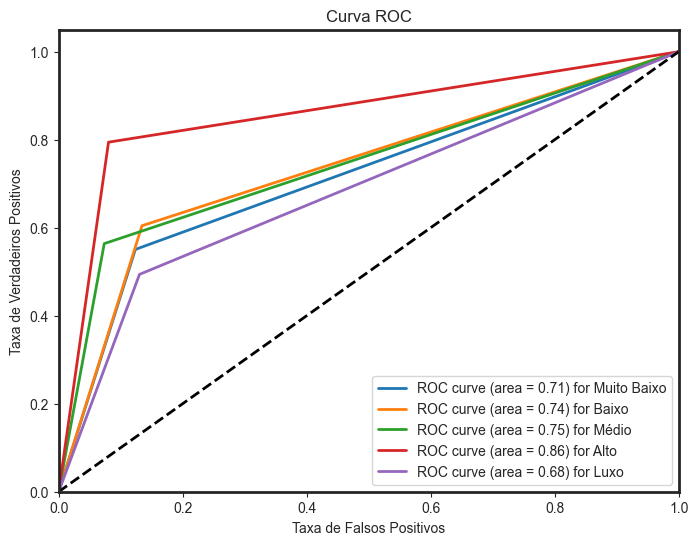

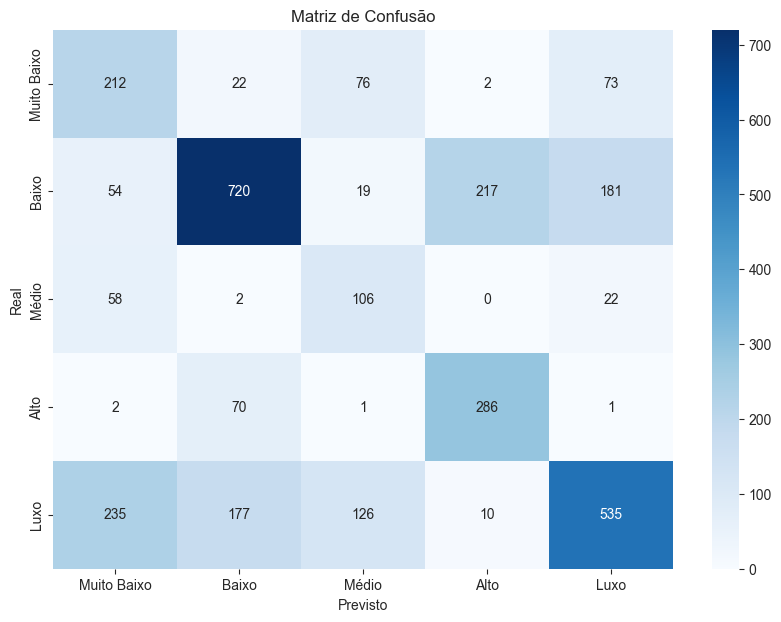

None
              precision    recall  f1-score   support

 Muito Baixo       0.38      0.55      0.45       385
       Baixo       0.73      0.60      0.66      1191
       Médio       0.32      0.56      0.41       188
        Alto       0.56      0.79      0.65       360
        Luxo       0.66      0.49      0.56      1083

    accuracy                           0.58      3207
   macro avg       0.53      0.60      0.55      3207
weighted avg       0.62      0.58      0.59      3207



In [268]:
from sklearn.svm import SVC

def svm(X_train_smote, y_train_smote):
    svm_model = SVC(random_state=42)
    svm_model.fit(X_train_smote, y_train_smote)
    return svm_model

modelo_classificacao(6, X2, y2)

## Decison Tree Classification

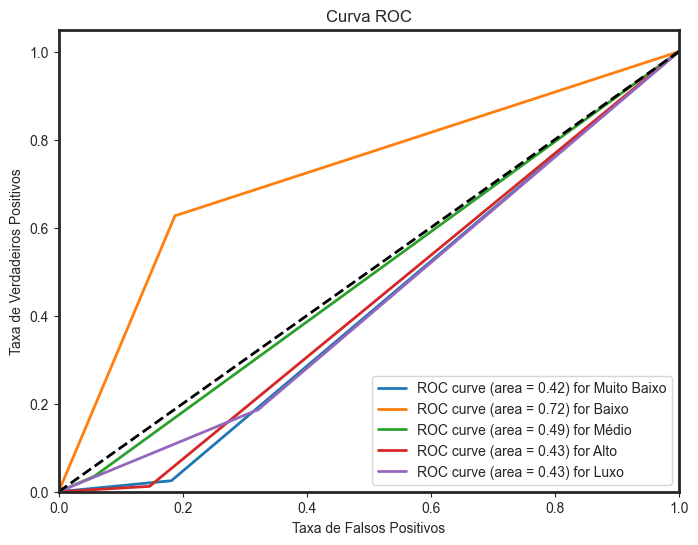

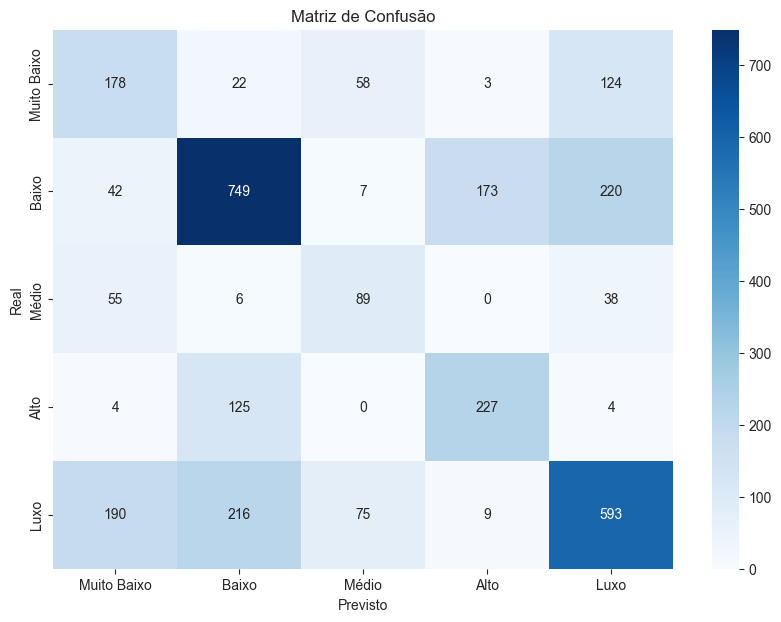

None
              precision    recall  f1-score   support

 Muito Baixo       0.38      0.46      0.42       385
       Baixo       0.67      0.63      0.65      1191
       Médio       0.39      0.47      0.43       188
        Alto       0.55      0.63      0.59       360
        Luxo       0.61      0.55      0.58      1083

    accuracy                           0.57      3207
   macro avg       0.52      0.55      0.53      3207
weighted avg       0.58      0.57      0.58      3207



In [269]:

from sklearn.tree import DecisionTreeClassifier

def decision_tree_cl(X_train_smote,y_train_smote):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train_smote, y_train_smote)
    return model
modelo_classificacao(7,X2,y2)

## Regressão Logística

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

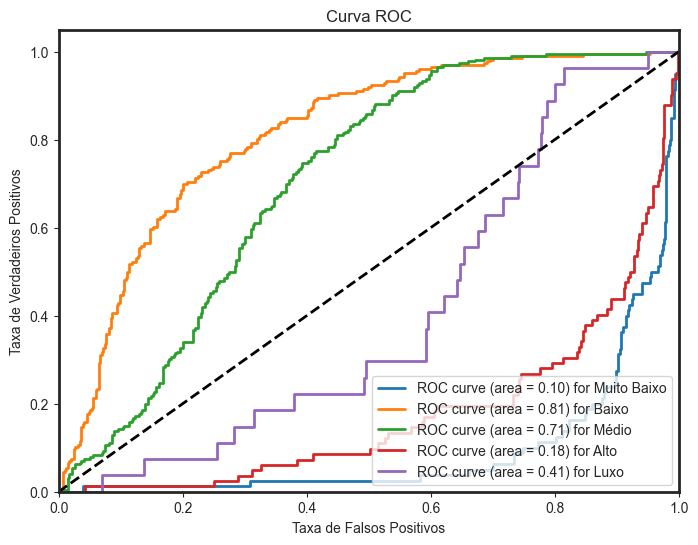

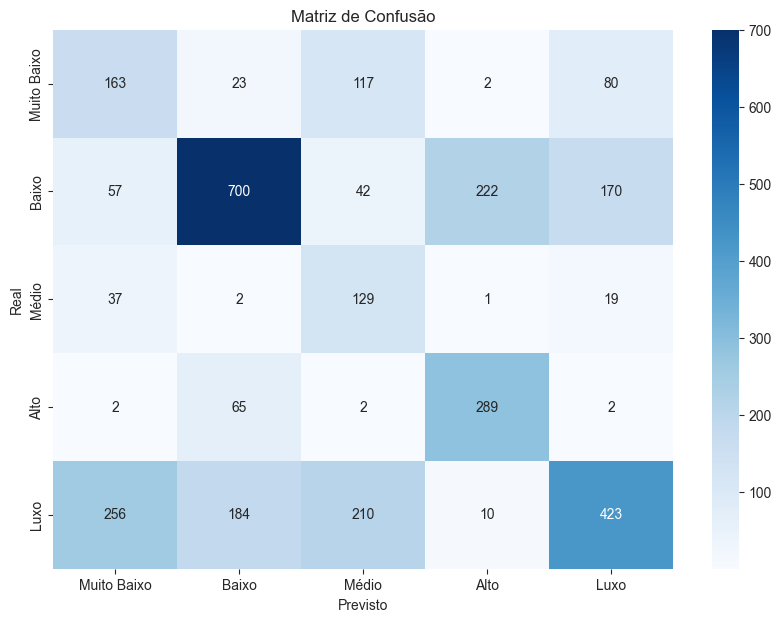

None
              precision    recall  f1-score   support

 Muito Baixo       0.32      0.42      0.36       385
       Baixo       0.72      0.59      0.65      1191
       Médio       0.26      0.69      0.38       188
        Alto       0.55      0.80      0.65       360
        Luxo       0.61      0.39      0.48      1083

    accuracy                           0.53      3207
   macro avg       0.49      0.58      0.50      3207
weighted avg       0.59      0.53      0.54      3207



In [270]:
from sklearn.linear_model import LogisticRegression

def regressao_logistica(X_train_smote,y_train_smote):
    model = LogisticRegression(random_state=42)
    model.fit(X_train_smote, y_train_smote)
    return model
    
modelo_classificacao(8,X2,y2)


## Net - classificação

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.2888 - loss: 1.5563 - val_accuracy: 0.0739 - val_loss: 1.2296
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4588 - loss: 1.1941 - val_accuracy: 0.4984 - val_loss: 0.8951
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5038 - loss: 1.1013 - val_accuracy: 0.4889 - val_loss: 0.9160
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5234 - loss: 1.0308 - val_accuracy: 0.5269 - val_loss: 0.9072
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5301 - loss: 1.0313 - val_accuracy: 0.7096 - val_loss: 0.6761
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5701 - loss: 0.9894 - val_accuracy: 0.6019 - val_loss: 0.8037
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5632 - loss: 1.0094 - val_accuracy: 0.6325 - val_loss: 0.7849
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5638 - loss: 0.9712 - val_accuracy: 0.

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3152 - loss: 1.5257 - val_accuracy: 0.1041 - val_loss: 1.1957
Epoch 2/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4741 - loss: 1.1654 - val_accuracy: 0.3070 - val_loss: 1.0836
Epoch 3/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5031 - loss: 1.1022 - val_accuracy: 0.5804 - val_loss: 0.8698
Epoch 4/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5076 - loss: 1.0664 - val_accuracy: 0.3554 - val_loss: 1.0394
Epoch 5/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5503 - loss: 1.0363 - val_accuracy: 0.5321 - val_loss: 0.9026
Epoch 6/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5564 - loss: 1.0241 - val_accuracy: 0.5741 - val_loss: 0.8604
Epoch 7/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5657 - loss: 0.9811 - val_accuracy: 0.6467 - val_loss: 0.7779
Epoch 8/50
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5424 - loss: 1.0242 - val_accuracy: 0.5952 - val_

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2948 - loss: 1.5402 - val_accuracy: 0.1812 - val_loss: 1.0967
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4510 - loss: 1.2031 - val_accuracy: 0.5586 - val_loss: 0.8583
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5083 - loss: 1.1079 - val_accuracy: 0.6578 - val_loss: 0.7660
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5048 - loss: 1.0838 - val_accuracy: 0.5874 - val_loss: 0.8175
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5247 - loss: 1.0519 - val_accuracy: 0.6269 - val_loss: 0.7716
Epoch 6/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5316 - loss: 1.0519 - val_accuracy: 0.6652 - val_loss: 0.7339
Epoch 7/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5665 - loss: 0.9903 - val_accuracy: 0.5970 - val_loss: 0.8139
Epoch 8/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5548 - loss: 1.0117 - val_accuracy: 0.6109 - val_

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3107 - loss: 1.5325 - val_accuracy: 0.2835 - val_loss: 1.1748
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4910 - loss: 1.1753 - val_accuracy: 0.4787 - val_loss: 0.9305
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4899 - loss: 1.1075 - val_accuracy: 0.5659 - val_loss: 0.8390
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5239 - loss: 1.0466 - val_accuracy: 0.6407 - val_loss: 0.7429
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5344 - loss: 1.0366 - val_accuracy: 0.6469 - val_loss: 0.7468
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5474 - loss: 1.0167 - val_accuracy: 0.6542 - val_loss: 0.7086
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5438 - loss: 1.0090 - val_accuracy: 0.5639 - val_loss: 0.8513
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5640 - loss: 0.9941 - val_accuracy: 0.5919 - val_

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2914 - loss: 1.5371 - val_accuracy: 0.0705 - val_loss: 1.2841
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 1.1850 - val_accuracy: 0.3140 - val_loss: 1.1484
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5117 - loss: 1.0719 - val_accuracy: 0.4611 - val_loss: 0.9813
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5391 - loss: 1.0350 - val_accuracy: 0.6756 - val_loss: 0.7451
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 1.0240 - val_accuracy: 0.6663 - val_loss: 0.7645
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5584 - loss: 1.0018 - val_accuracy: 0.4674 - val_loss: 0.9365
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5634 - loss: 0.9808 - val_accuracy: 0.5554 - val_loss: 0.8803
Epoch 8/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5556 - loss: 0.9881 - val_accuracy: 0.7285 - val_

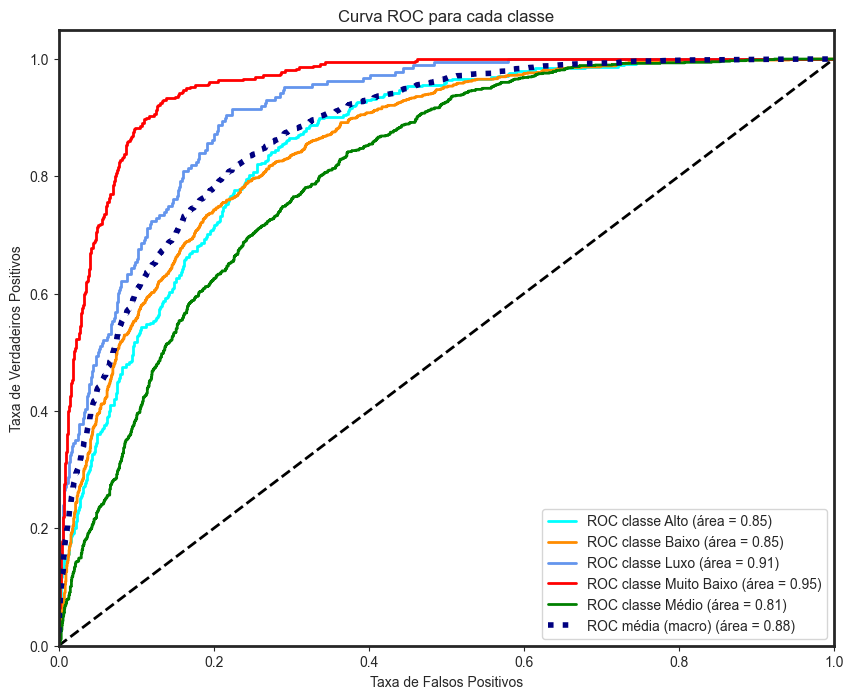

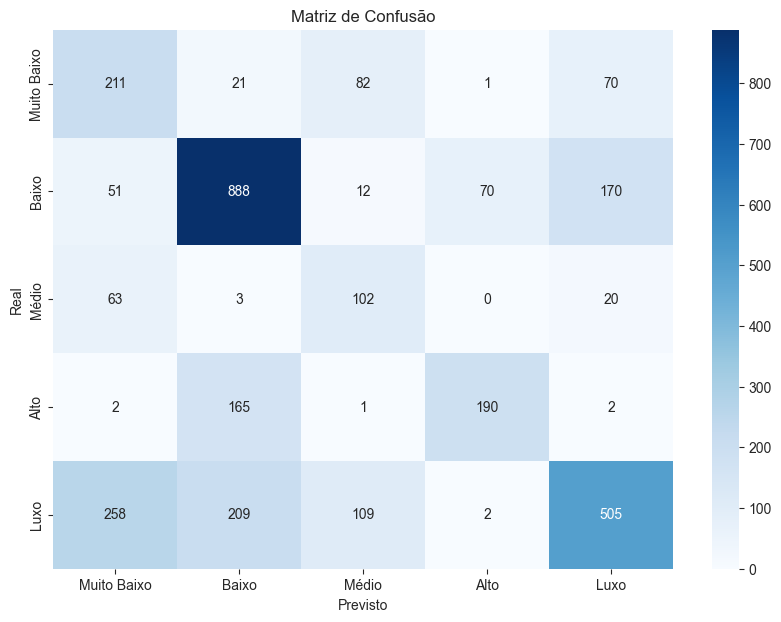

None
              precision    recall  f1-score   support

 Muito Baixo       0.36      0.55      0.44       385
       Baixo       0.69      0.75      0.72      1191
       Médio       0.33      0.54      0.41       188
        Alto       0.72      0.53      0.61       360
        Luxo       0.66      0.47      0.55      1083

    accuracy                           0.59      3207
   macro avg       0.55      0.57      0.54      3207
weighted avg       0.62      0.59      0.60      3207



In [271]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


def rn_cl(X_train_smote,y_train_smote,X_test_norm,y_test):
# transformação numerica
    le = LabelEncoder()
    y_train_smote_num = le.fit_transform(y_train_smote)
    y_test_num = le.transform(y_test)

    #vetores binarios
    y_train_smote_cat = to_categorical(y_train_smote_num)
    y_test_cat = to_categorical(y_test_num)

    # O mesmo que em regressão
    def create_nn_model(input_dim, output_dim):
        model = Sequential()
        model.add(Dense(64, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))  # Para classificação multiclasse
        return model

    input_dim = X_train_smote.shape[1]
    output_dim = y_train_smote_cat.shape[1]

    nn_model = create_nn_model(input_dim, output_dim)
    nn_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

    # Treinar o modelo
    nn_model.fit(X_train_smote, y_train_smote_cat, epochs=50, batch_size=32, validation_split=0.2)
    return nn_model,y_test_num,le

modelo_classificacao(10,X2,y2)


## Adaboost

c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\elisa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

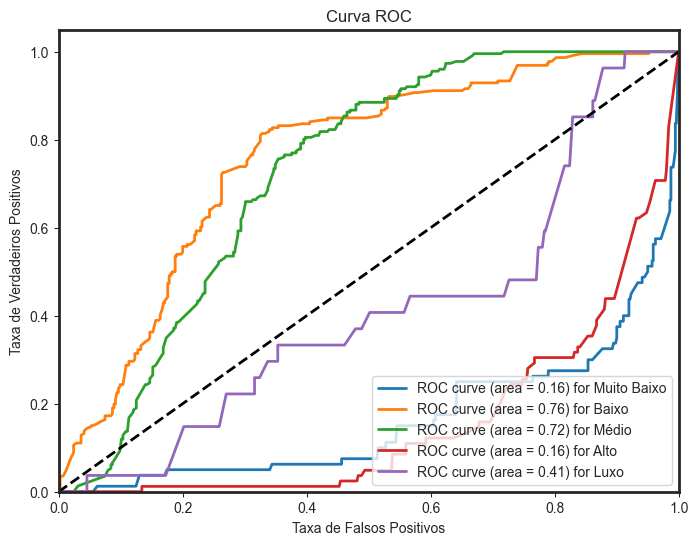

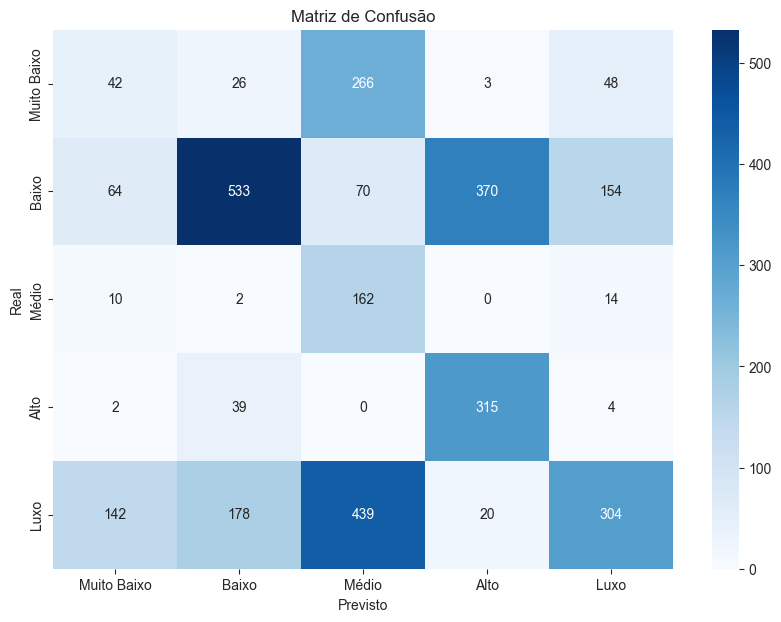

None
              precision    recall  f1-score   support

 Muito Baixo       0.16      0.11      0.13       385
       Baixo       0.69      0.45      0.54      1191
       Médio       0.17      0.86      0.29       188
        Alto       0.44      0.88      0.59       360
        Luxo       0.58      0.28      0.38      1083

    accuracy                           0.42      3207
   macro avg       0.41      0.51      0.39      3207
weighted avg       0.53      0.42      0.43      3207



In [272]:
from sklearn.ensemble import AdaBoostClassifier

def ada_boost_cl(X_train_smote,y_train_smote):
    ada_clf = AdaBoostClassifier(random_state=42)
    ada_clf.fit(X_train_smote, y_train_smote)
    return ada_clf
    
modelo_classificacao(9,X2,y2)